<a href="https://colab.research.google.com/github/anferivera/Programming/blob/main/3_1_Bisection_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One Variable Equations

Based in Diego Restrepo y Sebastian Bustamante notebooks. https://github.com/restrepo/ComputationalMethods

Throughout this section and the next ones we shall cover the topic of solutions to one variable equations. Many different problems in physics and astronomy require the use of complex expressions, even with implicit dependence of variables. When it is necessary to solve for one of those variable, an analytical approach is not usually the best solution, because of its complexity or even because it does not exist at all. Different approaches for dealing with this comprehend series expansions and numerical solutions. Among the most widely used numerical approaches are the Bisection or Binary-search method, fixed-point iteration, Newton's methods.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

- - -

# Bisection Method

The Bisection method exploits the [intermediate value theorem](http://en.wikipedia.org/wiki/Intermediate_value_theorem), where a continuous and differentiable function $f$ must have a zero between an interval $[a,b]$ such that (if) $f(a)f(b)<0$, or equivalently, there must be a value $p\in[a,b]$ such that $f(p)=0$. Below the algorithmm is stated explicitly.

## Steps BM

<div style="float: right;" markdown="1">
    <img src="http://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/300px-Bisection_method.svg.png">
</div>


1. There must be selected two values $a$ and $b$ such that $f(a)f(b)<0$ and $p\in[a,b]$ where $f(p)=0$. In other words, though we do not know the value of the root, we must know that there is at least one within the selected interval.

2. To begin, it must be set $a_1=a$ and $b_1=b$.

3. Calculate the mid-point $p_1$ as

    $$p_1 = a_1 + \frac{b_1-a_1}{2} = \frac{a_1+b_1}{2}$$

4. Evaluate the function in $p_1$, if the [stop condition](#Stop-Condition) is true, go to step 6.

5. If the [stop condition](#Stop-Condition) is not satisfied, then:

    1. If $f(p_1)f(a_1) > 0$, $p\in(p_1,b_1)$. Then set $a_2=p_1$ and $b_2=b_1$

    2. If $f(p_1)f(a_1) < 0$, $p\in(a_1,p_1)$. Then set $a_2=a_1$ and $b_2=p_1$

    3. Go to step 3 using $p_2$, $a_2$ and $b_2$ instead of $p_1$, $a_1$ and $b_1$. For next iterations the index increases until the [stop condition](#Stop-Condition) is reached.

6. The End!

## Stop condition BM

There are several different stop conditions for this algorithm. The most used are stated below:

* A fixed distance between the last two steps (absolute convergence):

    $$|p_i - p_{i-1}|<\epsilon$$

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

All these conditions should lead to a desired convergence expressed by the $\epsilon$ value. However, the first and the third conditions present some problems when the function has a derivative very large or close to $0$ as evaluated in the root value. When the function is very inclined, the first condition fails as a convergence in the $x$ axis does not guarantee a convergence in the $y$ axis, so the found root $p$ may be far from the real value. When the function is very flat ($dF/dx\rightarrow 0$), the third condition fails due to an analogous reason.

A final stop condition that does not have mathematical motivation yet computational is a maximum number of allowed iterations. This condition should be used not only for this algorithm but for all iteration-based numerical methods. This condition guarantees a finite computing time and prevents undesired infinite bucles.

* If $N>N_{max}$, stop!

## Error analysis BM

If we suppose $f\in C[a,b]$ and $f(a)f(b)<0$, the Bisection method generates a sequence of numbers $\left\{p_i\right\}_{i=1}^\infty$ approximating a root $p$ of $f$ as:

$$|p_i-p|\leq \frac{b-a}{2^i},\ \ \ \ \ i\geq 1$$

From this, we can conclude the convergence rate of the method is

$$p_i = p + \mathcal{O}\left( \frac{1}{2^i} \right)$$

This expression allows us to estimate the maximum number of required iterations for achieving a desired precision. The next figure sketches the number of iterations required for some precision.

Text(0, 0.5, 'Absolute Error $|p_n-p|$')

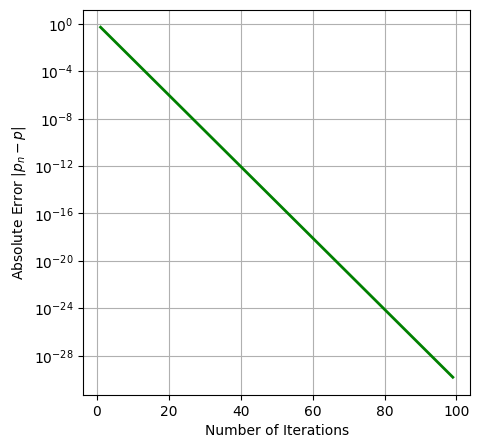

In [3]:
#Array of iterations
Niter = np.arange(1, 100, 1)

plt.figure( figsize=(5,5) )
plt.semilogy( Niter, 2.0**(-Niter), color="green", lw = 2 )
plt.grid(True)
plt.xlabel("Number of Iterations")
plt.ylabel("Absolute Error $|p_n-p|$")

## Example 1

Find the root of the function $f$

$f(x) = x^3 - 2$

for $20$ iterations, show the result and the relative error in each iteration.

## Rutina general del método. Estudiarla y tenerla presente...

In [4]:
#Defining Bisection function
def Bisection( f, a, b, Nmax, printer=False ):
    #verifying the STEP1, a and b with different signs
    if f(a)*f(b)>0:
        print("Error, f(a) and f(b) should have opposite signs")
        return False
    #Assigning the current extreme values, STEP2
    ai = a
    bi = b
    #Iterations
    n = 1
    while n<=Nmax:
        #Bisection, STEP3
        pi = (ai+bi)/2.0
        #Evaluating function in pi, STEP4 and STEP5
        if printer:
            print("Value for %d iterations:"%n,pi)
        #Condition A
        if f(pi)*f(ai)>0:
            ai = pi
        #Condition B
        elif f(pi)*f(ai)<0:
            bi = pi
        #Condition C: repeat the cycle
        n+=1
    #Final result
    return pi

In [5]:
2**(1/3)

1.2599210498948732

In [8]:
#Defining function
def function(x):
    f = x**3.0 - 2.0
    return f

#Finding the root of the function. The real root is 2**(1/3), so a & b should enclose this value
a = 0.0
b = 2.0
Nmax = 20

result = Bisection(function, a, b, Nmax, False)
print(result)
print("Real value:", 2**(1/3.))
print("Absolute error", abs((2**(1/3.)-result)))

1.2599210498948725
Real value: 1.2599210498948732
Absolute error 6.661338147750939e-16


In [12]:
#Only print the obtanied value
Bisection(function, a, b, Nmax, False)

1.2599201202392578

Using the error analysis, we can predict the produced error at $20$ iterations by computing:

$$ \left( \frac{1}{2^{20}}\right) \approx 9.53674316\times 10^{-7} $$

This value is very close to the obtained relative error.

If we were interested in a double precision, i.e. $\epsilon \sim 10^{-17}$, the number of required iterations would be:

$$ 10^{-17} = \left( \frac{1}{2^{N}}\right) \longrightarrow N = \frac{17}{\log_{10}(2)} \approx 56 $$

...

### <font color='red'> ACTIVITY: Lab 4.1 </font>

* In an IPython notebook, copy the last function and find the first solution to the equation
    
$ 7 = \sqrt{x^2+1}+e^x\sin x $

<font color='red'>    
CLUE: this solution is within the interval $[0,2]$.
</font>

* Find all the roots in $(0,16)$

## Example 2: to read in detail

In orbital mechanics, when solving the central-force problem it becomes necessary to solve the Kepler's equation. This is a transcendental equation that relates the orbital parameters of the trajectory.

*Kepler equation:* $M = E - \epsilon \sin E$

where $M$ is the mean anomaly, $E$ the eccentric anomaly and $\epsilon$ the eccentricity. The mean anomaly can be computed with the expression

$$M = n\ t = \sqrt{ \frac{GM_{\oplus}}{a^3} } t$$

where $n$ is the mean motion, $G$ the gravitational constant, $M_{\oplus}$ the mass of the central body and $a$ the semi-major axis. $t$ is the time where the position in the trajectory will be computed.

The coordinates $x$ and $y$ as time functions can be recovered by means of the next expressions

$$x(t) = a(\cos E - \epsilon)$$

$$y(t) = b\sin E$$

where $b = a \sqrt{1-\epsilon^2}$ is the semi-minor axis of the orbit and the implicit time-dependence of the eccentric anomaly $E$ is computed through the Kepler's equation.

**Problem:**

For a stallite orbiting the earth in a equatorial trajectory with eccentricity $\epsilon = 0.5$ at a geostationary distance for the semi-major axis, tabulate the positions $x$ and $y$ within the orbital plane in intervals of $15$ min during $5$ hours.

**Parameters:**

- $\epsilon = 0.5$

- $a = 35900$ km

- $G = 6.67384 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$

- $M_{\oplus} = 5.972\times 10^{24}$ kg

In [ ]:
#====================================================================
#Parameters
#====================================================================
#Eccentricity
eps = 0.5
#Semi-major axis    [m]
a = 35900e3
#Gravitational constant    [m3kg-1s-2]
GC = 6.67384e-11
#Earth mass    [kg]
Me = 5.972e24

#Semi-minor axis    [m]
b = a*(1-eps**2.0)**0.5
#Mean motion
n = ( GC*Me/a**3.0 )**0.5

#Hour to Second
HR2SC = 3600.
#Initial time    [hr]
t0 = 0*HR2SC
#Final time    [hr]
tf = 5*HR2SC
#Time step    [hr]
tstep = 0.25*HR2SC
#Number of maxim iterations
Niter = 56
#Root interval
a0 = -10
b0 = 10

#====================================================================
#Kepler Function
#====================================================================
def kepler( E ):
    func = E - eps*np.sin(E) - n*t
    return func

#====================================================================
#Position function
#====================================================================
def r(E):
    x = a*(np.cos(E)-eps)
    y = b*np.sin(E)
    return [x/1.e3, y/1.e3]

In 0.000000 hours, the satellite is located at (17950.000000,0.000000) km
In 0.250000 hours, the satellite is located at (17454.741542,5146.426647) km
In 0.500000 hours, the satellite is located at (16033.097675,10023.437750) km
In 0.750000 hours, the satellite is located at (13848.847528,14430.262364) km
In 1.000000 hours, the satellite is located at (11104.379909,18261.701894) km
In 1.250000 hours, the satellite is located at (7989.437466,21493.410338) km
In 1.500000 hours, the satellite is located at (4657.168469,24151.489610) km
In 1.750000 hours, the satellite is located at (1221.066166,26286.121177) km
In 2.000000 hours, the satellite is located at (-2238.747501,27954.872718) km
In 2.250000 hours, the satellite is located at (-5667.264143,29214.008624) km
In 2.500000 hours, the satellite is located at (-9027.373694,30114.739827) km
In 2.750000 hours, the satellite is located at (-12294.392344,30702.085866) km
In 3.000000 hours, the satellite is located at (-15452.164136,31014.965

Text(0, 0.5, '$y$ coordinate [km]')

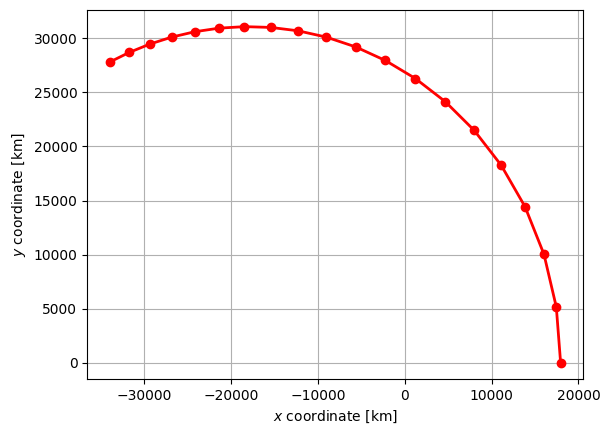

In [ ]:
#====================================================================
#Solving for different times
#====================================================================
#Time array
times = np.arange( t0, tf, tstep )

rpos = []
for t in times:
    #Finding the new eccentric anomaly
    E = Bisection( kepler, a0, b0, Niter )
    #Computing coordinates at this time
    ri = r(E)
    print("In %f hours, the satellite is located at (%f,%f) km"%(t/HR2SC, ri[0], ri[1]))
    rpos.append( ri )
rpos = np.array(rpos)

#Plotting
plt.plot( rpos[:,0], rpos[:,1], "o-", color="red", lw = 2 )
plt.grid(True)
plt.xlabel("$x$ coordinate [km]")
plt.ylabel("$y$ coordinate [km]")

- - -